In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")




In [2]:
file_path = '../data/raw/usda_food_access.csv'
df = pd.read_csv(file_path, encoding='latin1')


In [3]:
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (72531, 147)


,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [8]:



cols_of_interest = [
    'State', 'County', 'Urban', 'Pop2010',
    'LowIncomeTracts', 'LILATracts_1And10',
    'LATracts_half', 'LATracts1', 'LATracts10'
]



In [9]:
df_clean = df.dropna(subset=cols_of_interest)



In [10]:
df.columns.tolist()


['CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts_1And10',
 'LILATracts_halfAnd10',
 'LILATracts_1And20',
 'LILATracts_Vehicle',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LA1and10',
 'LAhalfand10',
 'LA1and20',
 'LATracts_half',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVehicle_20',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 

In [11]:
cols_of_interest = ['State', 'County', 'Urban', 'Pop2010', 
                    'LowIncomeTracts', 'LILATracts_1And10', 
                    'LATracts_half', 'LATracts1', 'LATracts10']

df_clean = df.dropna(subset=cols_of_interest)

df_clean = df_clean.rename(columns={
    'Pop2010': 'Population',
    'LowIncomeTracts': 'LowIncome',
    'LILATracts_1And10': 'LowIncomeLowAccess',
    'LATracts_half': 'LowAccess_half',
    'LATracts1': 'LowAccess_1mi',
    'LATracts10': 'LowAccess_10mi'
})

df_clean[['State', 'County', 'Urban', 'Population', 
          'LowIncome', 'LowIncomeLowAccess', 
          'LowAccess_half', 'LowAccess_1mi', 'LowAccess_10mi']].head()


,State,County,Urban,Population,LowIncome,LowIncomeLowAccess,LowAccess_half,LowAccess_1mi,LowAccess_10mi
0,Alabama,Autauga County,1,1912,0,0,1,1,0
1,Alabama,Autauga County,1,2170,1,1,1,1,0
2,Alabama,Autauga County,1,3373,0,0,1,1,0
3,Alabama,Autauga County,1,4386,0,0,1,1,0
4,Alabama,Autauga County,1,10766,0,0,1,1,0


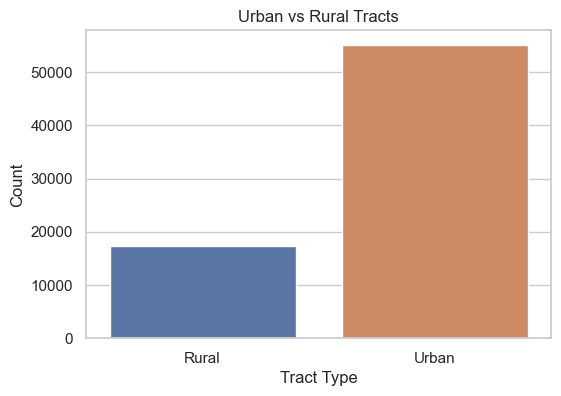

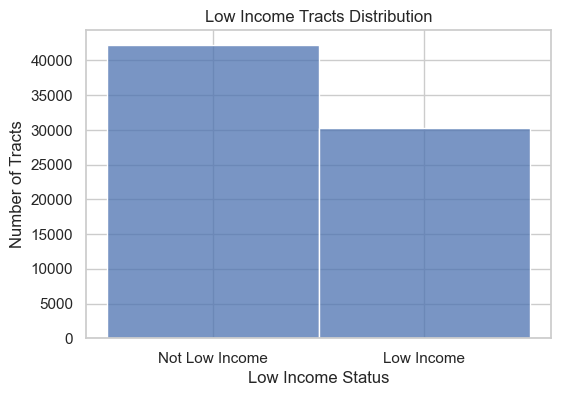

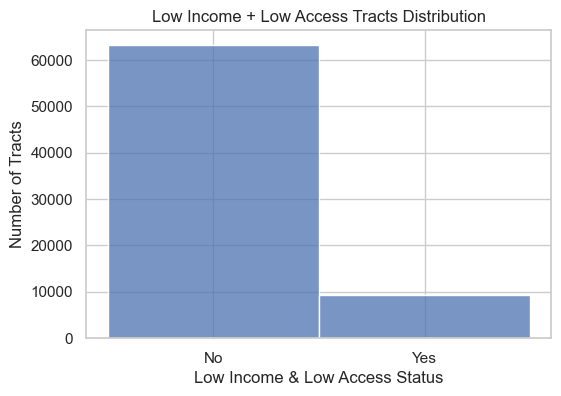

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot 1: Urban vs Rural Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Urban')
plt.title('Urban vs Rural Tracts')
plt.xticks([0, 1], ['Rural', 'Urban'])
plt.xlabel('Tract Type')
plt.ylabel('Count')
plt.show()

# Plot 2: Low Income vs Low Income + Low Access Tracts
plt.figure(figsize=(6, 4))
sns.histplot(data=df_clean, x='LowIncome', bins=2, stat='count', discrete=True)
plt.title('Low Income Tracts Distribution')
plt.xticks([0, 1], ['Not Low Income', 'Low Income'])
plt.xlabel('Low Income Status')
plt.ylabel('Number of Tracts')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=df_clean, x='LowIncomeLowAccess', bins=2, stat='count', discrete=True)
plt.title('Low Income + Low Access Tracts Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Low Income & Low Access Status')
plt.ylabel('Number of Tracts')
plt.show()


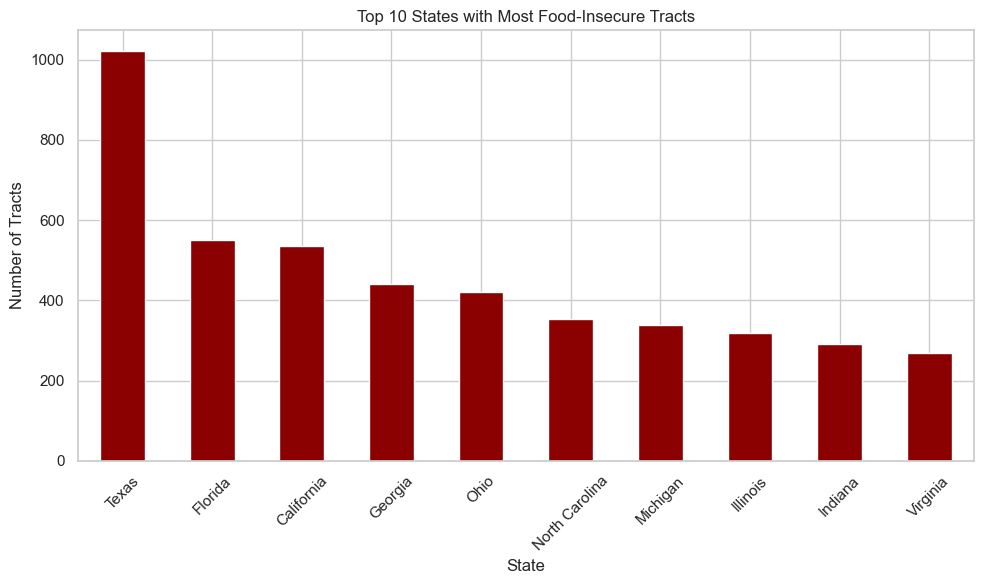

In [13]:
# Filter for food-insecure tracts
food_insecure = df_clean[df_clean['LowIncomeLowAccess'] == 1]

# Group by state and count
state_counts = food_insecure.groupby('State').size().sort_values(ascending=False)

# Plot top 10
top_10_states = state_counts.head(10)

top_10_states.plot(kind='bar', figsize=(10,6), color='darkred')
plt.title('Top 10 States with Most Food-Insecure Tracts')
plt.xlabel('State')
plt.ylabel('Number of Tracts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Export the cleaned dataset for Tableau
df_clean.to_csv('../data/processed/clean_food_access_data.csv', index=False)

print("Cleaned CSV saved for Tableau.")


Cleaned CSV saved for Tableau.
